**------------------- TUGAS PROYEK SAINS DATA --------------------**
---



- Nama  : Soni Indra Maulana
- NIM   : 210411100136
- Kelas : B

### TUJUAN PROYEK
---
#### Melakukan klasifikasi dan prediksi kualitas pada data red wine yang diproduksi oleh perusahaan vinho verde dengan menggunakan model klasifikasi dengan akurasi terbaik

In [65]:
import numpy as np
import scipy.stats
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.model_selection import train_test_split
import pickle

In [66]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from numpy.core.arrayprint import printoptions
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

In [115]:
data = pd.read_csv('winequality-red.csv')

# DATA UNDERSTANDING
---

###Teknik Pengumpulan Data
Studi ini akan membahas vinho verde, produk unik dari wilayah Minho (barat laut) Portugal.
Data dikumpulkan dari Mei 2004 hingga Februari 2007 hanya dengan menggunakan proteksi
penunjukan sampel asal yang diuji di badan sertifikasi resmi (CVRVV).CVRVV adalah organisasi antar-profesional dengan
tujuan meningkatkan kualitas dan pemasaran vinho verde. Datanya adalah
dicatat oleh sistem komputerisasi (iLab), yang secara otomatis mengelola
proses pengujian sampel anggur mulai dari permintaan produsen hingga analisis laboratorium dan sensorik
Setiap entri menunjukkan tes tertentu (analitis atau sensorik) dan
database akhir diekspor ke dalam satu lembar (.csv)

Tentang preferensi, setiap sampel dievaluasi oleh minimal tiga penilai sensorik (menggunakan pengecap buta),
yang menilai anggur dalam skala yang berkisar dari 0 (sangat buruk) hingga 10 (sangat baik).

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [69]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## TIPS DATA UNDERSTANDING

1.   Memahami dengan mendeskripsikan setiap fitur didalam dataset seperti:
- Deskripsi setiap fitur dalam dataset
- Tipe Data di setiap fitur dalam dataset

2.   Melakukan indetifikasi keberadaan Missing Values pada setiap fitur dalam dataset
3.   Eksplorasi Data (Visualisasi Data)
4.   Mengidentifikasi Outlier yang terdapat dalam dataset
5.   Mengidentifikasi jumlah proporsi data setiap kelas dalam data agar jika terdapat inbalancing pada data dapat diketahui



## DESKRIPSI FITUR
---


- **Fixed acidity (Kadar asam tartarat pada anggur) (g/dm3)** :

  Asam tetap yang dominan ditemukan dalam anggur adalah tartarat, malat, sitrat, dan
  suksinat.Tingkat masing-masing yang ditemukan dalam anggur bisa sangat bervariasi tetapi dalam
  secara umum orang akan mengharapkan untuk melihat 1.000 hingga 4.000 mg/L asam tartarat, 0 hingga 8.000 mg/L asam malat, 0 hingga 500 mg/L asam sitrat, dan 500 hingga 2.000 mg/L
  asam suksinat.
- **Volatile acidity (Kadar asam asetat pada anggur)(g/dm3)** :

  Keasaman yang mudah menguap adalah ukuran berat molekul rendah (atau uap
  dapat disuling) asam lemak dalam anggur dan umumnya dianggap sebagai bau
  cuka. Rata-rata
  nilai keasaman yang mudah menguap untuk anggur meja merah selama periode ini adalah sekitar 0,60
  gram/L.
- **Citric acid (Kadar asam sitrat dalam anggur)(g/dm3)** :

  Asam sitrat memiliki banyak kegunaan dalam produksi anggur. Asam sitrat adalah bahan organik lemah
  asam, yang sering digunakan sebagai pengawet alami atau bahan tambahan pada makanan atau
  minuman untuk menambah rasa asam pada makanan.
- **Residual Sugar(Kadar sisa gula pada wine)(g/dm3)**:

  Gula Residu berasal dari gula anggur alami yang tersisa dalam anggur setelahnya
  fermentasi alkohol selesai. Itu diukur dalam gram per liter. Sisa
  kadar gula bervariasi pada berbagai jenis anggur. Faktanya, banyak toko kelontong
  anggur berlabel "kering" mengandung sekitar 10 g/L sisa gula.
- **Chlorides (Kadar natrium klorida dalam anggur)(g/dm3)** :

  Klorida (natrium klorida) memberi rasa asin pada anggur yang bisa berubah
  menjauhkan konsumen potensial. Natrium klorida, umumnya dikenal sebagai garam, adalah
  senyawa ionik dengan rumus kimia NaCl. Maksimal
  konsentrasi klorida dalam anggur sekitar 0,20 - 0,60 g/L (Vallone et al.,
  2021).
- **Free sulfur dioxide (Tingkat sulfur dioksida bebas dalam anggur)(mg/dm3)**:

  Sulfur dioksida (SO2) dan garamnya telah ditambahkan selama pembuatan anggur
  sejak abad ke-17. Ini masih berpotensi
  menyebabkan reaksi merugikan dan produk beracun bagi konsumen anggur dan
  pembuat anggur dalam jumlah lebih dari 10 mg/L, dan karenanya, seharusnya
  ditangani dengan hati-hati.
- **Total sulfur dioxide (SO2 Total = SO2 bebas + SO2 bereaksi) (mg/dm3)** :

  Bagian dari sulfur dioksida bebas ditambah
  bagian yang terikat dengan bahan kimia lain di dalamnya
  anggur seperti aldehida, pigmen, atau
  gula
  konsentrasi nilai SO2 bebas 25 mg/L aktif
  anggur merah. SO2 yang aktif
  konsentrasi 0,35 mg/L memastikan perlindungan minimum, dan nilai
  Perlindungan maksimal 0,6 mg/L
- **Density(Kepadatan anggur) (g/cm3)** :

  Massa jenis adalah massa per satuan volume anggur atau harus pada 20◦C. Dia
  dinyatakan dalam gram per mililiter, dan dilambangkan dengan simbol 20◦C.
- **pH(tingkat keasaman anggur)(Range: 0 - 14)** :
  
  pH adalah skala yang digunakan untuk menentukan keasaman atau kebasaan suatu larutan berair
  (pH yang lebih rendah menunjukkan keasaman yang lebih tinggi). Tingkat pH anggur berkisar antara 3 hingga
  4.
- **Sulphates(Kadar kalium sulfat dalam anggur)(g/dm3)** :
  
  Sulfit, juga biasa disebut sulfur dioksida, adalah senyawa kimia yang
  mengandung ion sulfit. Mereka ditemukan secara alami dalam berbagai makanan
  sumbernya, termasuk teh hitam, kacang tanah, telur, dan makanan fermentasi. Meskipun mereka ditemukan di banyak makanan dan minuman,
  hal ini terutama terkait dengan daftar panjang efek samping yang berkaitan dengan anggur
  konsumsi, termasuk sakit kepala akibat anggur yang ditakuti (Roullier-Gall
  dkk., 2017).
- **Alcohol(Konsentrasi alkohol dalam anggur)(% vol. )** :

  Alkohol adalah senyawa organik yang membawa setidaknya satu hidroksil
  gugus fungsi (−OH) terikat pada atom karbon jenuh. Anggur bisa dimiliki
  berkisar antara 5% dan 23% Alkohol berdasarkan Volume (ABV).
  Output variable (based on sensory data)
- **quality (score between 0 and 10)** :
  
  Kisaran: Dibawah 7 bernilai 0 (Buruk). Sedangkan jika lebih dari angka 7 bernilai 1 (Bagus)

TIPE DATA
---

#### Terdapat beberapa Tipe Data yang terdapat didalam dataset, diantaranya
- Tipe Data Rasio

> - fixed acidity
> - volatile acidity
> - citric acid
> - residual sugar
> - chlorides
> - free sulfur dioxide
> - total sulfur dioxide
> - density
> - pH
> - sulphates
> - alcohol


- Tipe Data Ordional
> - quality

Banyak data dalam masing-masing kelasnya

In [70]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [71]:
data.quality.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

## IDENTIFIKASI MISSING VALUE

In [72]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## VISUALISASI DATA

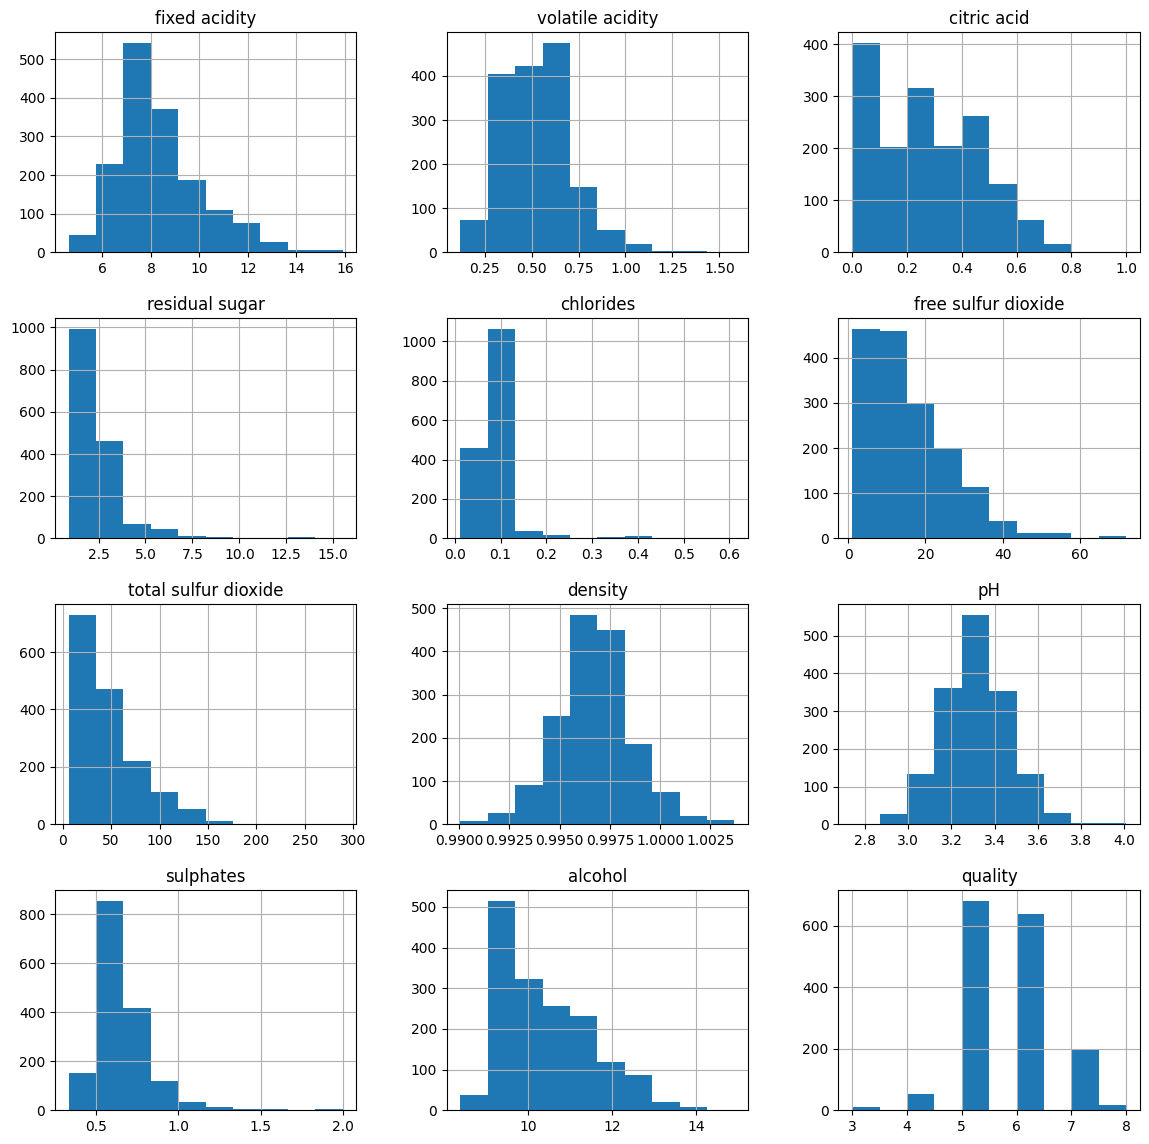

In [73]:
#distribution data
data.hist(figsize=(14, 14))
plt.show()

## IDENTIFIKASI OUTLIER

In [116]:
from scipy import stats
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    outliers = np.where(z_scores > threshold)
    return outliers[0]

outliers = detect_outliers_zscore(data)
print("Outliers:", len(outliers))

Outliers: 192


## TIPS MENETUKAN KUALITAS WINE (BURUK/BAIK)

##### Terdapat Tips untuk menangani masalah regresi maka dapat menetapkan batas kualitas anggur dimana, jika:

##### -Kualitas Anggur lebih besar sama dengan 7 maka dinyatakan "good" atau bernilai 1
##### -Kualitas Anggur di bawah angka 7 maka dinyatakan "not good" atau bernilai 0

##### Link Refrensi :  [disini](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)

In [75]:
fitur = data.drop('quality', axis= 1)
target = data['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)

## IDENTIFIKASI PROPORSI JUMLAH KELAS PADA DATA

In [76]:
target.value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

## PREPROCESSING DATA
---
#### Dari Data Understanding diatas dapat disimpulkan bahwasannya:
- Didalam data tidak memiliki Missing Values
- Didalam data juga terdapat outlier yang terdeteksi
- Terjadi Inbalancing pada data

### Maka dari itu perlu dilakukan beberapa langkah preprocessing pada data seperti:
- Penanganan pada Outlier
- Balancing Data agar jumlah kelas pada data menjadi seimbang

### Penanganan Pada Outlier Data

In [117]:
def remove_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data,axis=0))
    outliers = np.where(z_scores > threshold)

    # Menghapus outlier dari data
    data = data[~np.any(z_scores > threshold, axis=1)]

    return data
data = remove_outliers_zscore(data)
print("Data tanpa outlier:", len(data))

Data tanpa outlier: 1451


In [118]:
fitur = data.drop('quality', axis= 1)
target = data['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)

target.value_counts()

quality
0    1250
1     201
Name: count, dtype: int64

### Balancing Data

In [119]:
# import library
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Initialize RandomOverSampler
balancer = RandomOverSampler(random_state=42)

# Apply Random Over-Sampling to balance the classes
fitur_balance, target_balance = balancer.fit_resample(fitur, target)

# Print resampled class distribution
print('Resampled class distribution:', Counter(target_balance))

Resampled class distribution: Counter({0: 1250, 1: 1250})


In [120]:
# Membuat DataFrame dari fitur dan target yang telah seimbang
data_clean = pd.concat([fitur_balance, target_balance], axis=1)

# Menyimpan DataFrame ke dalam file CSV
data_clean.to_csv('data_clean.csv', index=False)

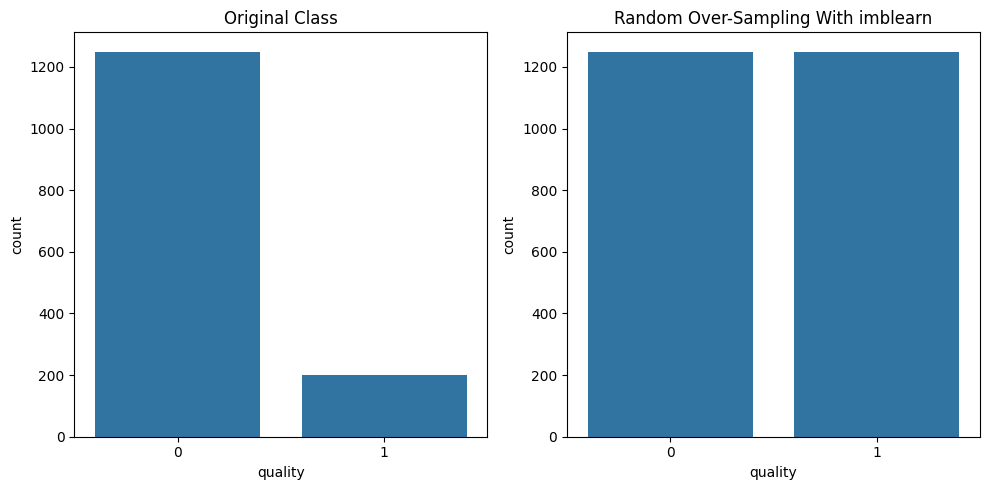

In [81]:
# Plot original class distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=pd.DataFrame({'quality': target}), x='quality')
plt.title('Original Class')

# Plot resampled class distribution after Random Over-Sampling
plt.subplot(1, 2, 2)
sns.countplot(data=pd.DataFrame({'quality': target_balance}), x='quality')
plt.title('Random Over-Sampling With imblearn')

plt.tight_layout()
plt.show()

## Mencari K atau Fitur yang berpengaruh pada dataset

In [82]:
selector = SelectKBest(score_func=mutual_info_classif, k='all')  # Untuk masalah klasifikasi
X_new = selector.fit_transform(fitur_balance,target_balance)
scores = selector.scores_

In [83]:
feature_scores = list(zip(fitur_balance.columns, scores))
feature_scores.sort(key=lambda x: -x[1])  # Urutkan berdasarkan skor Information Gain (dalam urutan menurun)

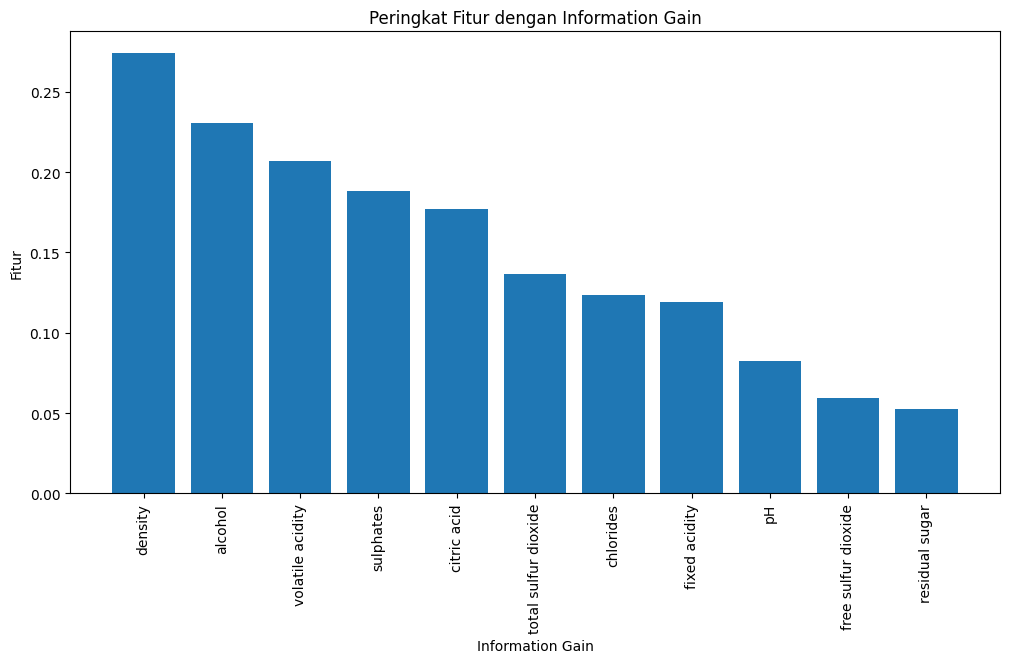

In [84]:
import matplotlib.pyplot as plt
feature_names, scores = zip(*feature_scores)
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_names)), scores)
plt.xticks(range(len(feature_names)), feature_names,rotation=90)
plt.ylabel('Fitur')
plt.xlabel('Information Gain')
plt.title('Peringkat Fitur dengan Information Gain')
plt.show()

## Membagi Data

In [85]:
fitur_train, fitur_test, target_train, target_test = train_test_split(fitur_balance, target_balance, test_size=0.25, random_state=42)

## Normalisasi Data

#### NORMALISASI ZSCORE

In [86]:
sc = StandardScaler()
zscore_training = sc.fit_transform(fitur_train)
zscore_testing = sc.transform(fitur_test)
joblib.dump(sc, 'zscore.pkl')


['zscore.pkl']

#### NORMALISASI MINMAX

In [87]:
mm = MinMaxScaler()
minmax_training = mm.fit_transform(fitur_train)
minmax_testing = mm.transform(fitur_test)
joblib.dump(mm, 'minmax.pkl')


['minmax.pkl']

In [88]:
selector = SelectKBest(score_func=mutual_info_classif, k='all')
selected_ft_zscore_training = selector.fit_transform(zscore_training, target_train)
selected_ft_zscore_testing = selector.transform(zscore_testing)
selected_ft_minmax_training = selector.fit_transform(minmax_training, target_train)
selected_ft_minmax_testing = selector.transform(minmax_testing)

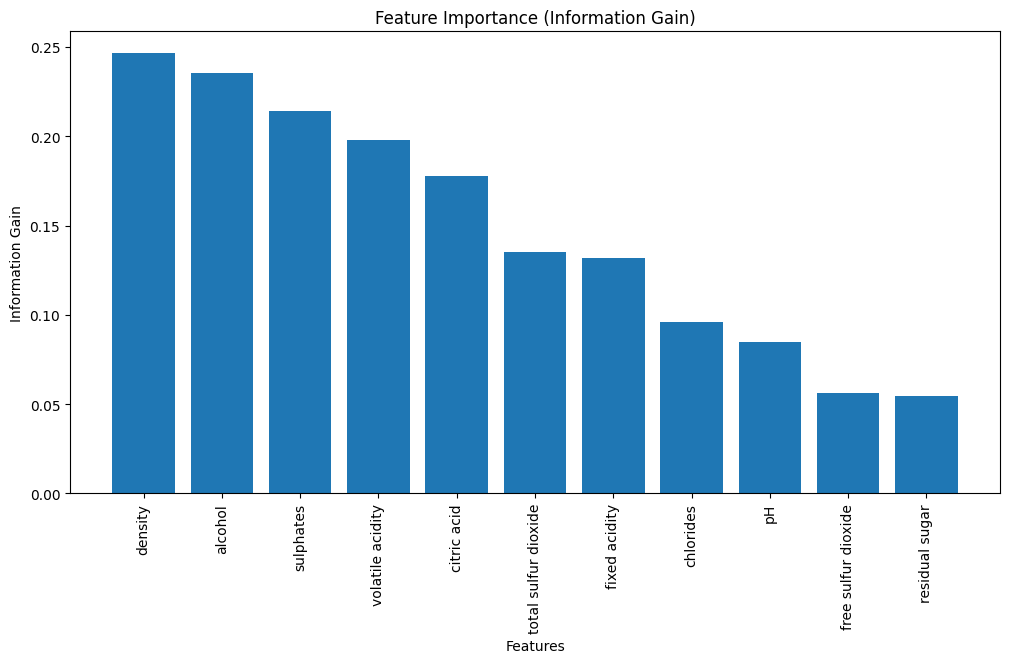

In [89]:
import matplotlib.pyplot as plt

feature_scores = selector.scores_
feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

# Sort the feature scores in descending order
sorted_indices = feature_scores.argsort()[::-1]

# Get the sorted feature scores and names
sorted_scores = feature_scores[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_feature_names)), sorted_scores)
plt.xticks(range(len(sorted_feature_names)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Information Gain')
plt.title('Feature Importance (Information Gain)')
plt.show()

# ZSCORE

ZSCORE RANDOM FOREST

In [90]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # You can adjust the number of trees
    'max_depth': [None, 10, 20, 30],  # You can adjust the maximum depth of each tree
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest model
random_forest = RandomForestClassifier()

# Create GridSearchCV for Random Forest
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(selected_ft_zscore_training, target_train)

# Display the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best parameters to create the Random Forest model
best_n_estimators = grid_search.best_params_['n_estimators']
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']
best_min_samples_leaf = grid_search.best_params_['min_samples_leaf']


Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [91]:
model_rf_zscore = RandomForestClassifier( max_depth= best_max_depth,min_samples_leaf= best_min_samples_leaf,min_samples_split= best_min_samples_split, n_estimators= best_n_estimators)
joblib.dump(model_rf_zscore, 'model_rf_zscore.pkl')

['model_rf_zscore.pkl']

Mencari k terbaik melalui model terbaik >>>>

In [92]:
best_accuracy_rf_zscore = 0
best_k_zscore_rf = 0
for k in range(1, fitur_train.shape[1] + 1):
    # Buat objek SelectKBest dengan mutual_info_classif sebagai fungsi skor
    k_best = SelectKBest(score_func=mutual_info_classif, k=k)
    selected_ft_zscore_training = k_best.fit_transform(zscore_training, target_train)
    selected_ft_zscore_testing = k_best.transform(zscore_testing)
    model_rf_zscore = RandomForestClassifier( max_depth= best_max_depth,min_samples_leaf= best_min_samples_leaf,min_samples_split= best_min_samples_split, n_estimators= best_n_estimators)
    model_rf_zscore.fit(selected_ft_zscore_training, target_train)

    # Lakukan prediksi pada data uji dengan normalisasi zscore
    y_pred_zscore = model_rf_zscore.predict(selected_ft_zscore_testing)

    # Hitung akurasi dengan normalisasi zscore
    accuracy_rf_zscore = accuracy_score(target_test, y_pred_zscore)
    if accuracy_rf_zscore > best_accuracy_rf_zscore:
        best_accuracy_rf_zscore = accuracy_rf_zscore
        best_k_zscore_rf = k
print("Random Forest Zscore:")
print("Banyak fitur", best_k_zscore_rf, "dengan akurasi : ", best_accuracy_rf_zscore)
best_feature_indices_zscore = SelectKBest(score_func=mutual_info_classif, k=best_k_zscore_rf).fit(selected_ft_zscore_training, target_train).get_support(indices=True)
best_features_zscore = [fitur.columns[i] for i in best_feature_indices_zscore]

print("Fitur terbaik yang digunakan (dengan normalisasi Zscore):")
print(best_features_zscore)


Random Forest Zscore:
Banyak fitur 5 dengan akurasi :  0.9712
Fitur terbaik yang digunakan (dengan normalisasi Zscore):
['volatile acidity', 'citric acid', 'density', 'sulphates', 'alcohol']


ZSCORE LOGISTIC REGRESSION

In [93]:
  # Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # You can adjust the regularization parameter
    'penalty': ['l1', 'l2'],  # You can choose the type of penalty (L1 or L2)
}

# Create a Logistic Regression model
logistic_regression = LogisticRegression(solver='liblinear')

# Create GridSearchCV for Logistic Regression
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(selected_ft_zscore_training, target_train)

# Display the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best parameters to create the Logistic Regression model
best_C = grid_search.best_params_['C']
best_penalty = grid_search.best_params_['penalty']

Best Parameters: {'C': 1, 'penalty': 'l2'}


In [94]:
model_lr_zscore = LogisticRegression(C=best_C,penalty=best_penalty,solver='liblinear')
joblib.dump(model_lr_zscore, 'model_lr_zscore.pkl')

['model_lr_zscore.pkl']

Mencari k terbaik melalui model terbaik >>>>

In [95]:
best_accuracy_lr_zscore = 0
best_k_zscore_lr = 0
for k in range(1, fitur_train.shape[1] + 1):
    # Buat objek SelectKBest dengan mutual_info_classif sebagai fungsi skor
    k_best = SelectKBest(score_func=mutual_info_classif, k=k)
    selected_ft_zscore_training = k_best.fit_transform(zscore_training, target_train)
    selected_ft_zscore_testing = k_best.transform(zscore_testing)
    model_zscore = LogisticRegression(
    C=best_C,
    penalty=best_penalty,
    solver='liblinear'
  )
    model_zscore.fit(selected_ft_zscore_training, target_train)

    # Lakukan prediksi pada data uji dengan normalisasi zscore
    y_pred_zscore = model_zscore.predict(selected_ft_zscore_testing)

    # Hitung akurasi dengan normalisasi zscore
    accuracy_lr_zscore = accuracy_score(target_test, y_pred_zscore)
    if accuracy_lr_zscore > best_accuracy_lr_zscore:
        best_accuracy_lr_zscore = accuracy_lr_zscore
        best_k_zscore_lr = k
print("Logistic Regression Zscore:")
print("Fitur terbaik yang bisa digunakan", best_k_zscore_lr, "dengan akurasi : ", best_accuracy_lr_zscore)
best_feature_indices_zscore = SelectKBest(score_func=mutual_info_classif, k=best_k_zscore_lr).fit(selected_ft_zscore_training, target_train).get_support(indices=True)
best_features_zscore = [fitur.columns[i] for i in best_feature_indices_zscore]

print("Fitur terbaik yang digunakan (dengan normalisasi Zscore):")
print(best_features_zscore)


Logistic Regression Zscore:
Fitur terbaik yang bisa digunakan 11 dengan akurasi :  0.8
Fitur terbaik yang digunakan (dengan normalisasi Zscore):
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


ZSCORE DECISION TREE

In [96]:
# Define the parameter grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
}

# Create a Decision Tree model
dt_classifier = DecisionTreeClassifier()

# Create GridSearchCV for Decision Tree
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(selected_ft_zscore_training, target_train)

# Display the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best parameters to create the Decision Tree model
best_criterion = grid_search.best_params_['criterion']
best_splitter = grid_search.best_params_['splitter']
best_max_depth = grid_search.best_params_['max_depth']


Best Parameters: {'criterion': 'entropy', 'max_depth': 50, 'splitter': 'random'}


In [97]:
model_dt_zscore = DecisionTreeClassifier(criterion=best_criterion,splitter=best_splitter,max_depth=best_max_depth)
joblib.dump(model_dt_zscore, 'model_dt_zscore.pkl')

['model_dt_zscore.pkl']

Mencari k terbaik melalui model terbaik >>>>

In [98]:
best_accuracy_dt_zscore = 0
best_k_zscore_dt = 0
for k in range(1, fitur_train.shape[1] + 1):
    # Buat objek SelectKBest dengan mutual_info_classif sebagai fungsi skor
    k_best = SelectKBest(score_func=mutual_info_classif, k=k)
    selected_ft_zscore_training = k_best.fit_transform(zscore_training, target_train)
    selected_ft_zscore_testing = k_best.transform(zscore_testing)
    model_zscore = DecisionTreeClassifier(
    criterion=best_criterion,
    splitter=best_splitter,
    max_depth=best_max_depth
    )
    model_zscore.fit(selected_ft_zscore_training, target_train)

    # Lakukan prediksi pada data uji dengan normalisasi zscore
    y_pred_zscore = model_zscore.predict(selected_ft_zscore_testing)

    # Hitung akurasi dengan normalisasi zscore
    accuracy_dt_zscore = accuracy_score(target_test, y_pred_zscore)
    if accuracy_dt_zscore > best_accuracy_dt_zscore:
        best_accuracy_dt_zscore = accuracy_dt_zscore
        best_k_zscore_dt = k
print("Decision Tree Zscore:")
print("Banyak fitur", best_k_zscore_dt, "dengan akurasi : ", best_accuracy_dt_zscore)
best_feature_indices_zscore = SelectKBest(score_func=mutual_info_classif, k=best_k_zscore_dt).fit(selected_ft_zscore_training, target_train).get_support(indices=True)
best_features_zscore = [fitur.columns[i] for i in best_feature_indices_zscore]

print("Fitur terbaik yang digunakan (dengan normalisasi Zscore):")
print(best_features_zscore)


Decision Tree Zscore:
Banyak fitur 8 dengan akurasi :  0.968
Fitur terbaik yang digunakan (dengan normalisasi Zscore):
['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']


# MINMAX

MINMAX RANDOM FOREST

In [99]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # You can adjust the number of trees
    'max_depth': [None, 10, 20, 30],  # You can adjust the maximum depth of each tree
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest model
random_forest = RandomForestClassifier()

# Create GridSearchCV for Random Forest
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(selected_ft_minmax_training, target_train)

# Display the best parameters
print("Best Parameters:", grid_search.best_params_)


# Use the best parameters to create the Random Forest model
best_n_estimators = grid_search.best_params_['n_estimators']
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']
best_min_samples_leaf = grid_search.best_params_['min_samples_leaf']



Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [100]:
model_rf_minmax = RandomForestClassifier( max_depth= best_max_depth,min_samples_leaf= best_min_samples_leaf,min_samples_split= best_min_samples_split, n_estimators= best_n_estimators)
joblib.dump(model_rf_minmax, 'model_rf_minmax.pkl')

['model_rf_minmax.pkl']

mencari k terbaik dari model klasifikasi terbaik >>>>>>

In [101]:
best_accuracy_rf_minmax = 0
best_k_minmax_rf = 0
for k in range(1, fitur_train.shape[1] + 1):
    # Buat objek SelectKBest dengan mutual_info_classif sebagai fungsi skor
    k_best = SelectKBest(score_func=mutual_info_classif, k=k)
    selected_ft_minmax_training = k_best.fit_transform(minmax_training, target_train)
    selected_ft_minmax_testing = k_best.transform(minmax_testing)
    model_minmax = RandomForestClassifier(max_depth= best_max_depth,
                                          min_samples_leaf= best_min_samples_leaf,
                                          min_samples_split= best_min_samples_split, n_estimators= best_n_estimators)
    model_minmax.fit(selected_ft_minmax_training, target_train)

    # Lakukan prediksi pada data uji dengan normalisasi minmax
    y_pred_minmax = model_minmax.predict(selected_ft_minmax_testing)

    # Hitung akurasi dengan normalisasi minmax
    accuracy_rf_minmax = accuracy_score(target_test, y_pred_minmax)
    if accuracy_rf_minmax > best_accuracy_rf_minmax:
        best_accuracy_rf_minmax = accuracy_rf_minmax
        best_k_minmax_rf = k
print("Random Forest Minmax:")
print("Banyak fitur", best_k_minmax_rf, "dengan akurasi : ", best_accuracy_rf_minmax)
best_feature_indices_minmax = SelectKBest(score_func=mutual_info_classif, k=best_k_minmax_rf).fit(selected_ft_minmax_training, target_train).get_support(indices=True)
best_features_minmax = [fitur.columns[i] for i in best_feature_indices_minmax]

print("Fitur terbaik yang digunakan (dengan normalisasi Minmax):")
print(best_features_minmax)


Random Forest Minmax:
Banyak fitur 11 dengan akurasi :  0.9728
Fitur terbaik yang digunakan (dengan normalisasi Minmax):
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


MINMAX LOGISTIC REGRESSION

In [102]:
# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # You can adjust the regularization parameter
    'penalty': ['l1', 'l2'],  # You can choose the type of penalty (L1 or L2)
}

# Create a Logistic Regression model
logistic_regression = LogisticRegression(solver='liblinear')

# Create GridSearchCV for Logistic Regression
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(selected_ft_minmax_training, target_train)

# Display the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best parameters to create the Logistic Regression model
best_C = grid_search.best_params_['C']
best_penalty = grid_search.best_params_['penalty']


Best Parameters: {'C': 10, 'penalty': 'l1'}


In [103]:
model_lr_minmax = LogisticRegression(C=best_C,penalty=best_penalty,solver='liblinear')
joblib.dump(model_lr_minmax, 'model_lr_minmax.pkl')

['model_lr_minmax.pkl']

Mencari k terbaik melalui model terbaik >>>>

In [104]:
best_accuracy_lr_minmax = 0
best_k_minmax_lr = 0
for k in range(1, fitur_train.shape[1] + 1):
    # Buat objek SelectKBest dengan mutual_info_classif sebagai fungsi skor
    k_best = SelectKBest(score_func=mutual_info_classif, k=k)
    selected_ft_minmax_training = k_best.fit_transform(minmax_training, target_train)
    selected_ft_minmax_testing = k_best.transform(minmax_testing)
    model_minmax = LogisticRegression(
    C=best_C,
    penalty=best_penalty,
    solver='liblinear'
    )
    model_minmax.fit(selected_ft_minmax_training, target_train)

    # Lakukan prediksi pada data uji dengan normalisasi Minmax
    y_pred_minmax = model_minmax.predict(selected_ft_minmax_testing)

    # Hitung akurasi dengan normalisasi Minmax
    accuracy_lr_minmax = accuracy_score(target_test, y_pred_minmax)
    if accuracy_lr_minmax > best_accuracy_lr_minmax:
        best_accuracy_lr_minmax = accuracy_lr_minmax
        best_k_minmax_lr = k
print("Logistic Regression Minmax:")
print("Banyak fitur", best_k_minmax_lr, "dengan akurasi : ", best_accuracy_lr_minmax)
best_feature_indices_minmax = SelectKBest(score_func=mutual_info_classif, k=best_k_minmax_lr).fit(selected_ft_minmax_training, target_train).get_support(indices=True)
best_features_minmax = [fitur.columns[i] for i in best_feature_indices_minmax]

print("Fitur terbaik yang digunakan (dengan normalisasi minmax):")
print(best_features_minmax)


Logistic Regression Minmax:
Banyak fitur 6 dengan akurasi :  0.8
Fitur terbaik yang digunakan (dengan normalisasi minmax):
['volatile acidity', 'citric acid', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']


MINMAX DECISION TREE

In [105]:

# Define the parameter grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
}

# Create a Decision Tree model
dt_classifier = DecisionTreeClassifier()

# Create GridSearchCV for Decision Tree
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(selected_ft_minmax_training, target_train)

# Display the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best parameters to create the Decision Tree model
best_criterion = grid_search.best_params_['criterion']
best_splitter = grid_search.best_params_['splitter']
best_max_depth = grid_search.best_params_['max_depth']


Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'splitter': 'best'}


In [106]:
model_dt_minmax = DecisionTreeClassifier(criterion=best_criterion,splitter=best_splitter,max_depth=best_max_depth)
joblib.dump(model_dt_minmax, 'model_dt_minmax.pkl')

['model_dt_minmax.pkl']

In [107]:
best_accuracy_dt_minmax = 0
best_k_minmax_dt = 0
for k in range(1, fitur_train.shape[1] + 1):
    # Buat objek SelectKBest dengan mutual_info_classif sebagai fungsi skor
    k_best = SelectKBest(score_func=mutual_info_classif, k=k)
    selected_ft_minmax_training = k_best.fit_transform(minmax_training, target_train)
    selected_ft_minmax_testing = k_best.transform(minmax_testing)
    model_minmax = DecisionTreeClassifier(
    criterion=best_criterion,
    splitter=best_splitter,
    max_depth=best_max_depth
    )
    model_minmax.fit(selected_ft_minmax_training, target_train)

    # Lakukan prediksi pada data uji dengan normalisasi minmax
    y_pred_minmax = model_minmax.predict(selected_ft_minmax_testing)

    # Hitung akurasi dengan normalisasi minmax
    accuracy_dt_minmax = accuracy_score(target_test, y_pred_minmax)
    if accuracy_dt_minmax > best_accuracy_dt_minmax:
        best_accuracy_dt_minmax = accuracy_dt_minmax
        best_k_minmax_dt = k
print("Decision Tree Minmax:")
print("Banyak fitur", best_k_minmax_dt, "dengan akurasi : ", best_accuracy_dt_minmax)
best_feature_indices_minmax = SelectKBest(score_func=mutual_info_classif, k=best_k_minmax_dt).fit(selected_ft_minmax_training, target_train).get_support(indices=True)
best_features_minmax = [fitur.columns[i] for i in best_feature_indices_minmax]

print("Fitur terbaik yang digunakan (dengan normalisasi Minmax):")
print(best_features_minmax)


Decision Tree Minmax:
Banyak fitur 9 dengan akurasi :  0.9664
Fitur terbaik yang digunakan (dengan normalisasi Minmax):
['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


# PERBANDINGAN

In [108]:
import pandas as pd

methods = ["ZSCORE Random Forest", "ZSCORE Logistic Regression","ZSCORE Decision Tree", "MINMAX Random Forest", "MINMAX Logistic Regression","MINMAX Decision Tree"]
accuracies = [best_accuracy_rf_zscore, best_accuracy_lr_zscore,best_accuracy_dt_zscore,best_accuracy_rf_minmax, best_accuracy_lr_minmax,best_accuracy_dt_minmax]
k_values = [best_k_zscore_rf, best_k_zscore_lr,best_k_zscore_dt,best_k_minmax_rf, best_k_minmax_lr,best_k_minmax_dt]


results_df = pd.DataFrame({'Metode': methods, 'Akurasi': accuracies, 'Banyak Fitur Yang digunakan': k_values})

print(results_df)


                       Metode  Akurasi  Banyak Fitur Yang digunakan
0        ZSCORE Random Forest   0.9712                            5
1  ZSCORE Logistic Regression   0.8000                           11
2        ZSCORE Decision Tree   0.9680                            8
3        MINMAX Random Forest   0.9728                           11
4  MINMAX Logistic Regression   0.8000                            6
5        MINMAX Decision Tree   0.9664                            9
